# Tarea 08
## Sebastián González Juárez

Hacer el ejercicio 4, completo de la clase 09. Revisen el PDF.
Deben, con sus propios dígitos, decir donde se equivoca el modelo, discutan cuales son los que clasifica correctamente y cuales no.
¿Como pueden analizar eso? Exactamente con las características. Si dibujaron un 7 y les salió un 1. Entonces analiza un modelo entrenando los dígitos 1 y 7. Plotea la imagen de importancia de características y podrás apreciar la razón de la confusión.
Creen su propio diccionario de dígitos. Dibujen solo los números del 0 al 9 y suban sus imágenes como un .zip en esta tarea.

## 1.
Entrenar un RandomForestClassifier para cada d ́ıgito del 0 al 9 usando
todos los 70,000 d ́ıgitos (train-test 60,000-10,000), obtener la importancia de
caracter ́ısticas y visualizarla como un heatmap.

In [1]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

Carguemos los datos de MNIST

In [2]:
mnist  = fetch_openml('mnist_784')
X, y = mnist["data"], mnist["target"].astype(np.uint8)

Veamos los digitos:

In [3]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

En este caso si usaremos los 70 mil datos, dividamos tal como se indica:

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=60000, test_size=10000, random_state=42, stratify=y)

Entrnemos usando RandomForestClassifier

In [5]:
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

* n_estimators=100: nos dice el n. de árboles del bosque.
* random_state=42: para repetir con la semilla.
* n_jobs=-1: -1 significa que se usarán todos los procesadores disponibles, lo que acelerara el entrenamiento al distribuir el trabajo entre múltiples núcleos de CPU.

Obtenemos la precisión en el conjunto de prueba:

In [6]:
from sklearn.metrics import accuracy_score
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión en el conjunto de prueba: {accuracy}")

Precisión en el conjunto de prueba: 0.9683


Muy buena jaja

Vamos a obtener la importnacia global de los píxeles:

In [7]:
importancias = rf.feature_importances_

Para eso necesitaremos converitr a un formato imagen de 28x28

In [8]:
importancias_img = importancias.reshape(28, 28)

Ploteemos:

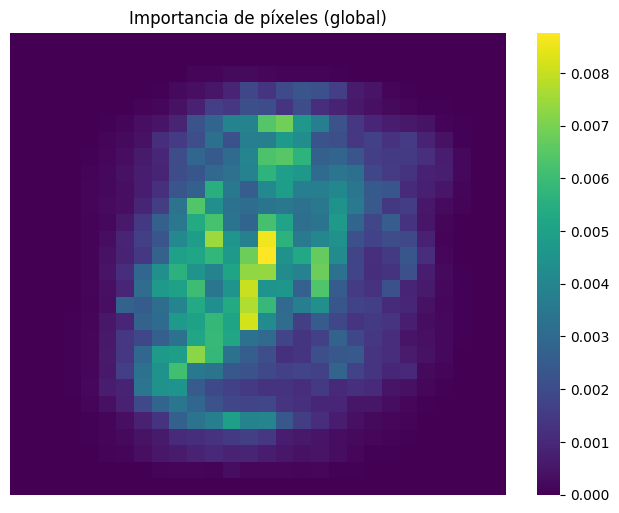

In [9]:
plt.figure(figsize=(8, 6))
sns.heatmap(importancias_img, cmap="viridis")
plt.title("Importancia de píxeles (global)")
plt.axis('off')
plt.show()

Los n  píxeles más relevantes,:

In [10]:
importancias = rf.feature_importances_


In [11]:
# Número de píxeles más importantes a mostrar (modificar a interés)
n = 10

indices_importantes = np.argsort(importancias)[::-1][:n]

print("Píxeles más importantes (global):")
for idx in indices_importantes:
    fila = idx // 28
    columna = idx % 28
    importancia = importancias[idx]
    print(f"Píxel en posición (fila={fila}, columna={columna}) - Importancia: {importancia:.6f}")


Píxeles más importantes (global):
Píxel en posición (fila=13, columna=14) - Importancia: 0.008765
Píxel en posición (fila=12, columna=14) - Importancia: 0.008583
Píxel en posición (fila=17, columna=13) - Importancia: 0.008158
Píxel en posición (fila=15, columna=13) - Importancia: 0.008035
Píxel en posición (fila=16, columna=13) - Importancia: 0.007725
Píxel en posición (fila=12, columna=11) - Importancia: 0.007453
Píxel en posición (fila=14, columna=14) - Importancia: 0.007357
Píxel en posición (fila=14, columna=13) - Importancia: 0.007297
Píxel en posición (fila=19, columna=10) - Importancia: 0.007235
Píxel en posición (fila=5, columna=15) - Importancia: 0.006882


Ahora veamos digito por digito.

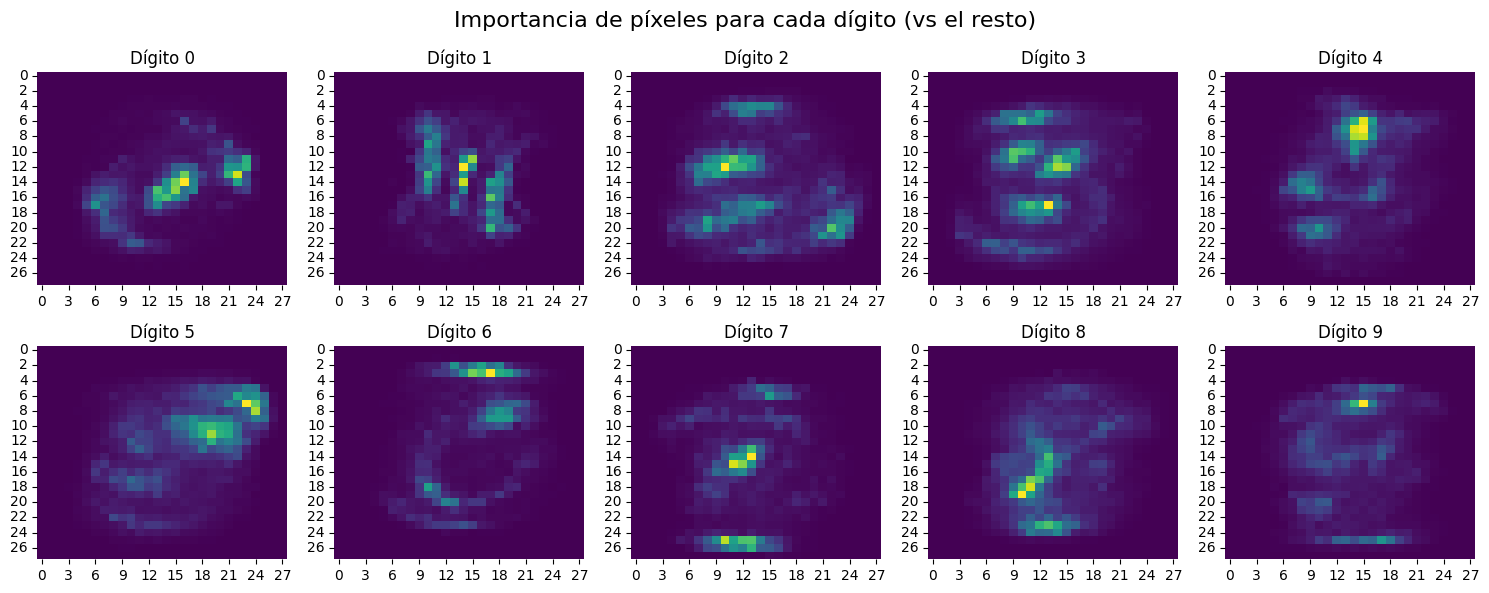

In [12]:
# figura con una cuadrícula de 2 filas x 5 columnas para los subplots
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

# Iteremos sobre cada dígito del 0 al 9
for digit in range(10):

    # Crea etiquetas binarias (1 para el dígito actual, 0 para los demás)
    y_binary = (y_train == digit).astype(np.uint8)

    # clasificador Random Forest
    rf_digit = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

    # Entrena el modelo para distinguir el dígito actual vs todos los demás
    rf_digit.fit(X_train, y_binary)

    # Obtiene las importancias de características y las redimensiona a 28x28
    importancias_d = rf_digit.feature_importances_.reshape(28, 28)

    # Selecciona el subplot correspondiente
    ax = axes[digit // 5, digit % 5]

    # mapa de calor con las importancias de los píxeles
    sns.heatmap(importancias_d, ax=ax, cbar=False, cmap='viridis')

    # título del dígito actual
    ax.set_title(f"Dígito {digit}")

    # visualización de los ejes
    ax.axis('on')

# Información del polt
plt.suptitle("Importancia de píxeles para cada dígito (vs el resto)", fontsize=16)
plt.tight_layout()
plt.show()


Notemos que este codigo tarda por que generamos varis veces las línea:

**trf_digit = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)**

Es necesaria, pues si la dejamos afuera o la que ya estaba, estaríamos sobrescribiendo el modelo una y otra vez, y solo conservarías el último clasificador.

Veamos cada digito:
* 0: vemos la importancia del borde circular exterior. No tenemos líneas rectas ni huecos internos definidos.
* 1: Tenemos la línea vertical central.
* 2: Considero que lo que más hace notar es el inicio y el final de cuando lo dibujamos. Una forma de zigzag.
* 3: Vemos 2 lobulos, uno arriba y otro abajo.
* 4: Podemos ver unas intersecciones que con esos angulos forman un triangulo, sin embargo es muy poco y supongo es debido a que la gente escribe el 4 de formas diferentes, tanto cerrando como abierto en la parte superior.
* 5: Vemos bastante concentración en la parte superior derecha.
* 6: Tenemos bastante en la parte superior y se logra ver un circulo.
* 7: Tenemos relvancia en una diagonal.
* 8: Se logra ver el curce formado por la intersección de los 2 circulos.
* 9: Se indentifica claramente un circulo en la mitad superior.

Para los pixeles más importantes de cada digito, agreguemos lo que hicimos en el global:

In [13]:
print("\nPíxeles más importantes por dígito:")

for digit in range(10):
    y_binary = (y_train == digit).astype(np.uint8)
    rf_digit = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
    rf_digit.fit(X_train, y_binary)

    importancias_digit = rf_digit.feature_importances_
    indices_top = np.argsort(importancias_digit)[::-1][:n]

    print(f"\nDígito {digit}:")
    for idx in indices_top:
        fila = idx // 28
        columna = idx % 28
        importancia = importancias_digit[idx]
        print(f"  Píxel (fila={fila}, columna={columna}) - Importancia: {importancia:.6f}")



Píxeles más importantes por dígito:

Dígito 0:
  Píxel (fila=14, columna=16) - Importancia: 0.027459
  Píxel (fila=13, columna=22) - Importancia: 0.025606
  Píxel (fila=15, columna=15) - Importancia: 0.022609
  Píxel (fila=14, columna=15) - Importancia: 0.021513
  Píxel (fila=13, columna=16) - Importancia: 0.021218
  Píxel (fila=15, columna=13) - Importancia: 0.019472
  Píxel (fila=16, columna=14) - Importancia: 0.019315
  Píxel (fila=13, columna=21) - Importancia: 0.018183
  Píxel (fila=12, columna=23) - Importancia: 0.017709
  Píxel (fila=16, columna=13) - Importancia: 0.017303

Dígito 1:
  Píxel (fila=12, columna=14) - Importancia: 0.028145
  Píxel (fila=14, columna=14) - Importancia: 0.025747
  Píxel (fila=11, columna=15) - Importancia: 0.023604
  Píxel (fila=16, columna=17) - Importancia: 0.021108
  Píxel (fila=13, columna=10) - Importancia: 0.019058
  Píxel (fila=20, columna=17) - Importancia: 0.018657
  Píxel (fila=9, columna=10) - Importancia: 0.016444
  Píxel (fila=14, column

# 2.

Escribir a mano los d ́ıgitos del 0 al 9, tomarles foto y recortar cada uno

en una imagen individual, preprocesar las im ́agenes (escala de grises, redimen-
sionar, invertir si es necesario), clasificarlas con el modelo entrenado, mostrar

la predicci ́on para cada imagen, discutir sobre cu ́ales fueron clasificados correc-
tamente y en cu ́ales se equivoc ́o el modelo.

Importamos paquetería:

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

Esta función nos ayudara a la conversión.

In [15]:
def cargar_imagen(path):
  img = Image.open(path).convert("L")
  img = img.resize((28, 28))
  img_array = np.array(img)
  if img_array.mean() > 127:
    img_array = 255 - img_array
  img_flat = img_array.reshape(1, -1)
  return img_flat, img_array

Esta función nos ayudara a obtener la proba de ser cada digito y la predicción del modelo.

In [16]:
def predict_digit(rf, img_flat):
  probas = rf.predict_proba(img_flat)
  for i, p in enumerate(probas[0]):
      print(f"Dígito {i}: {p:.3f}")
  print()
  prediccion = rf.predict(img_flat)
  print(prediccion)

path = "/content/drive/MyDrive/TSFC3_Ciencia_de_Datos/Clase09/1.png"
img_flat, img_array = cargar_imagen(path)


## Digito: 1

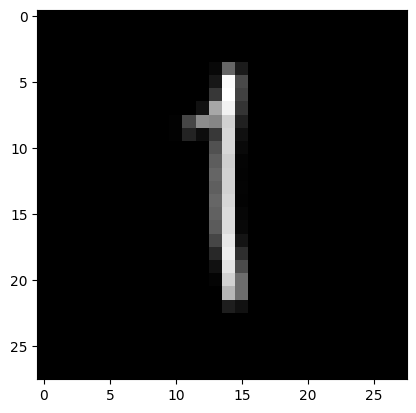

In [17]:
path = "/content/drive/MyDrive/TSFC3_Ciencia_de_Datos/Clase09/1.png"
img_flat, img_array = cargar_imagen(path)

plt.imshow(img_array, cmap='gray')
plt.show()

Calculemos la proba de ser cualquiera de los digitos:

In [18]:
predict_digit(rf, img_flat)

Dígito 0: 0.000
Dígito 1: 0.810
Dígito 2: 0.010
Dígito 3: 0.000
Dígito 4: 0.020
Dígito 5: 0.030
Dígito 6: 0.000
Dígito 7: 0.070
Dígito 8: 0.050
Dígito 9: 0.010

[1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## Digito: 2

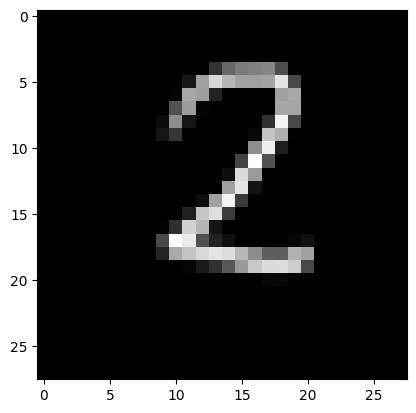

In [19]:
path = "/content/drive/MyDrive/TSFC3_Ciencia_de_Datos/Clase09/2.png"
img_flat, img_array = cargar_imagen(path)

plt.imshow(img_array, cmap='gray')
plt.show()

In [20]:
predict_digit(rf, img_flat)

Dígito 0: 0.010
Dígito 1: 0.030
Dígito 2: 0.560
Dígito 3: 0.110
Dígito 4: 0.030
Dígito 5: 0.020
Dígito 6: 0.100
Dígito 7: 0.050
Dígito 8: 0.080
Dígito 9: 0.010

[2]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## Digito: 3

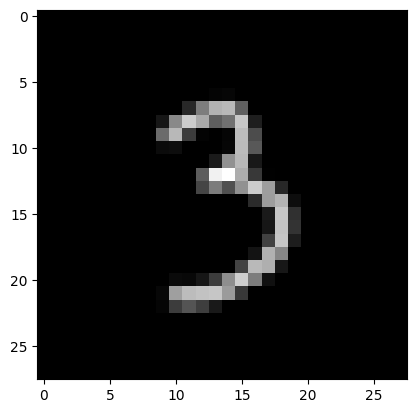

In [21]:
path = "/content/drive/MyDrive/TSFC3_Ciencia_de_Datos/Clase09/3.png"
img_flat, img_array = cargar_imagen(path)

plt.imshow(img_array, cmap='gray')
plt.show()

In [22]:
predict_digit(rf, img_flat)

Dígito 0: 0.000
Dígito 1: 0.040
Dígito 2: 0.030
Dígito 3: 0.380
Dígito 4: 0.050
Dígito 5: 0.220
Dígito 6: 0.010
Dígito 7: 0.120
Dígito 8: 0.030
Dígito 9: 0.120

[3]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## Digito: 4

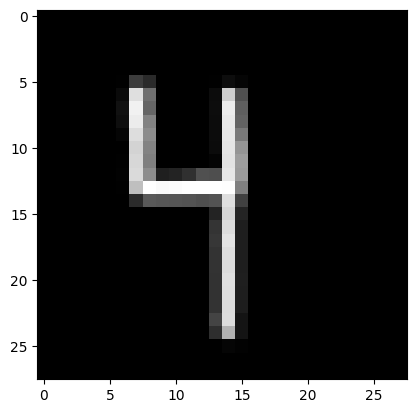

In [23]:
path = "/content/drive/MyDrive/TSFC3_Ciencia_de_Datos/Clase09/4.png"
img_flat, img_array = cargar_imagen(path)

plt.imshow(img_array, cmap='gray')
plt.show()

In [24]:
predict_digit(rf, img_flat)

Dígito 0: 0.000
Dígito 1: 0.270
Dígito 2: 0.030
Dígito 3: 0.110
Dígito 4: 0.190
Dígito 5: 0.130
Dígito 6: 0.030
Dígito 7: 0.070
Dígito 8: 0.110
Dígito 9: 0.060

[1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## Digito: 5

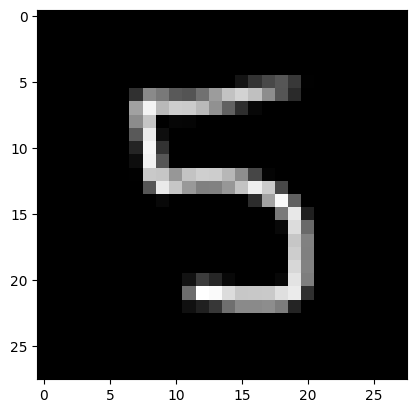

In [25]:
path = "/content/drive/MyDrive/TSFC3_Ciencia_de_Datos/Clase09/5.png"
img_flat, img_array = cargar_imagen(path)

plt.imshow(img_array, cmap='gray')
plt.show()

In [26]:
predict_digit(rf, img_flat)

Dígito 0: 0.000
Dígito 1: 0.000
Dígito 2: 0.010
Dígito 3: 0.180
Dígito 4: 0.050
Dígito 5: 0.680
Dígito 6: 0.020
Dígito 7: 0.000
Dígito 8: 0.010
Dígito 9: 0.050

[5]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## Digito: 6

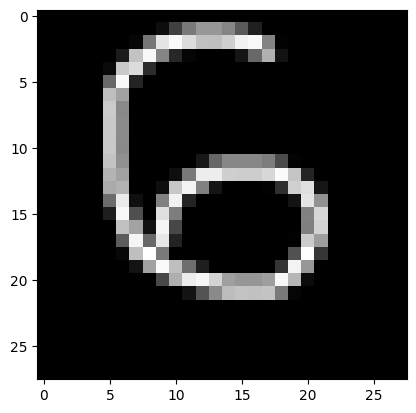

In [27]:
path = "/content/drive/MyDrive/TSFC3_Ciencia_de_Datos/Clase09/6.png"
img_flat, img_array = cargar_imagen(path)

plt.imshow(img_array, cmap='gray')
plt.show()

In [28]:
predict_digit(rf, img_flat)

Dígito 0: 0.080
Dígito 1: 0.010
Dígito 2: 0.040
Dígito 3: 0.030
Dígito 4: 0.040
Dígito 5: 0.150
Dígito 6: 0.560
Dígito 7: 0.070
Dígito 8: 0.010
Dígito 9: 0.010

[6]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## Digito: 7

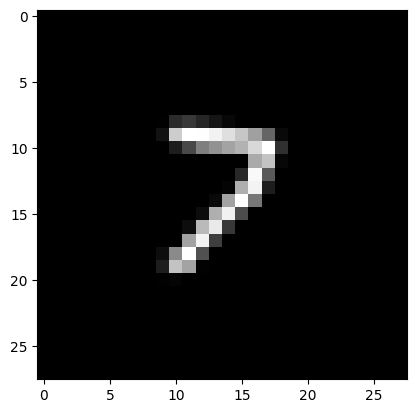

In [29]:
path = "/content/drive/MyDrive/TSFC3_Ciencia_de_Datos/Clase09/7.png"
img_flat, img_array = cargar_imagen(path)

plt.imshow(img_array, cmap='gray')
plt.show()

In [30]:
predict_digit(rf, img_flat)

Dígito 0: 0.000
Dígito 1: 0.140
Dígito 2: 0.300
Dígito 3: 0.020
Dígito 4: 0.040
Dígito 5: 0.040
Dígito 6: 0.020
Dígito 7: 0.250
Dígito 8: 0.100
Dígito 9: 0.090

[2]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## Digito: 8

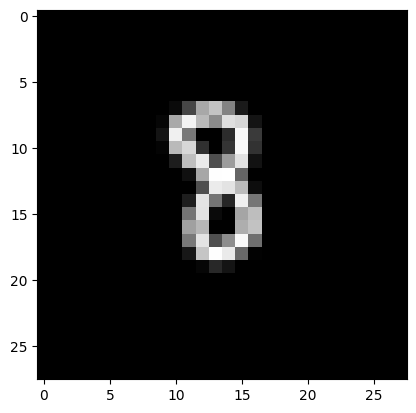

In [31]:
path = "/content/drive/MyDrive/TSFC3_Ciencia_de_Datos/Clase09/8.png"
img_flat, img_array = cargar_imagen(path)

plt.imshow(img_array, cmap='gray')
plt.show()

In [32]:
predict_digit(rf, img_flat)

Dígito 0: 0.000
Dígito 1: 0.110
Dígito 2: 0.150
Dígito 3: 0.070
Dígito 4: 0.050
Dígito 5: 0.080
Dígito 6: 0.040
Dígito 7: 0.150
Dígito 8: 0.110
Dígito 9: 0.240

[9]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## Digito: 9

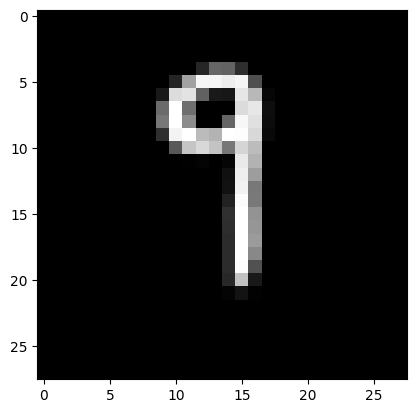

In [33]:
path = "/content/drive/MyDrive/TSFC3_Ciencia_de_Datos/Clase09/9.png"
img_flat, img_array = cargar_imagen(path)

plt.imshow(img_array, cmap='gray')
plt.show()

In [34]:
predict_digit(rf, img_flat)

Dígito 0: 0.020
Dígito 1: 0.170
Dígito 2: 0.170
Dígito 3: 0.120
Dígito 4: 0.080
Dígito 5: 0.020
Dígito 6: 0.000
Dígito 7: 0.300
Dígito 8: 0.050
Dígito 9: 0.070

[7]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## Digito: 0

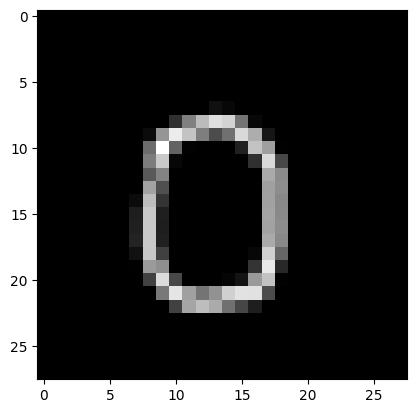

In [35]:
path = "/content/drive/MyDrive/TSFC3_Ciencia_de_Datos/Clase09/0.png"
img_flat, img_array = cargar_imagen(path)

plt.imshow(img_array, cmap='gray')
plt.show()

In [36]:
predict_digit(rf, img_flat)

Dígito 0: 0.270
Dígito 1: 0.000
Dígito 2: 0.040
Dígito 3: 0.040
Dígito 4: 0.050
Dígito 5: 0.160
Dígito 6: 0.090
Dígito 7: 0.230
Dígito 8: 0.010
Dígito 9: 0.110

[0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Podemos ver que:

1.  Lo predijo con mucha diferencia.
2. No se tuvo mayor problema, aún se mantuvo mayor a la mitad la presición.
3. Si bien bajo la proba, se sigue predicciondo con diferencia
4. Se tiene el porblema de detectar un 1, tomar en cuenta que el 4 si fue la segunda predicción más alta, esto puede debere a las 2 formas en la que la gente escribe el 4.
5. Lo predijo con mucha diferencia.
6. Muy parecido al segundo caso, se mantuvo mayor a la mitad la presición.
7. Fallo la predicción, sin embargo se quedaron muy cerca la mayor que fue 2 y la que buscabamos.
8. Nuevamente tenemos problema pues lo predijo como 9, puede deberse al circulo superior que ambos núm tienen.
9. Creo es el caso más grave, pues no se acerco nada a lo buscado y lo interpreta como 7.

  0. Si bien bajo la proba, se sigue predicciondo con diferencia

Para ver los porblemas se me ocurrio hacer los mapas de calor de las 3 imagenes (digito con mayor predicción, digito buscado, nuestra imagen)

In [38]:
def comparar_importancias_con_imagen(digito1, digito2, X_train, y_train, img_flat, img_array, umbral=0.1):
    # Clasificador para digito1
    y_d1 = (y_train == digito1).astype(np.uint8)
    rf_d1 = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
    rf_d1.fit(X_train, y_d1)
    importancia_d1 = rf_d1.feature_importances_.reshape(28, 28)

    # Clasificador para digito2
    y_d2 = (y_train == digito2).astype(np.uint8)
    rf_d2 = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
    rf_d2.fit(X_train, y_d2)
    importancia_d2 = rf_d2.feature_importances_.reshape(28, 28)

    # Imagen binaria (píxeles activos)
    mapa_img = (img_array > 0).astype(int)

    # Normalizamos importancias
    norm_d1 = importancia_d1 / np.max(importancia_d1)
    norm_d2 = importancia_d2 / np.max(importancia_d2)

    # Máscaras de píxeles importantes
    mask_d1 = (norm_d1 > umbral).astype(int)
    mask_d2 = (norm_d2 > umbral).astype(int)

    # Porcentajes de coincidencia
    inter_d1 = np.sum(mask_d1 * mapa_img)
    inter_d2 = np.sum(mask_d2 * mapa_img)
    total_d1 = np.sum(mask_d1)
    total_d2 = np.sum(mask_d2)

    porcentaje_d1 = 100 * inter_d1 / total_d1 if total_d1 > 0 else 0
    porcentaje_d2 = 100 * inter_d2 / total_d2 if total_d2 > 0 else 0

    # Imprimir resultados
    print(f"Coincidencia con imagen para dígito {digito1}: {porcentaje_d1:.2f}%")
    print(f"Coincidencia con imagen para dígito {digito2}: {porcentaje_d2:.2f}%")

    # Graficar los mapas de calor
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    sns.heatmap(norm_d1, ax=axes[0], cmap='viridis', cbar=False)
    axes[0].set_title(f"Importancia dígito {digito1}")
    axes[0].axis('off')

    sns.heatmap(norm_d2, ax=axes[1], cmap='viridis', cbar=False)
    axes[1].set_title(f"Importancia dígito {digito2}")
    axes[1].axis('off')

    sns.heatmap(mapa_img, ax=axes[2], cmap='Greys', cbar=False)
    axes[2].set_title("Imagen cargada")
    axes[2].axis('off')

    plt.tight_layout()
    plt.show()

## Digito 1
No tuvimos problema, veremos con el que más se acerco.

Coincidencia con imagen para dígito 7: 25.00%
Coincidencia con imagen para dígito 1: 29.35%


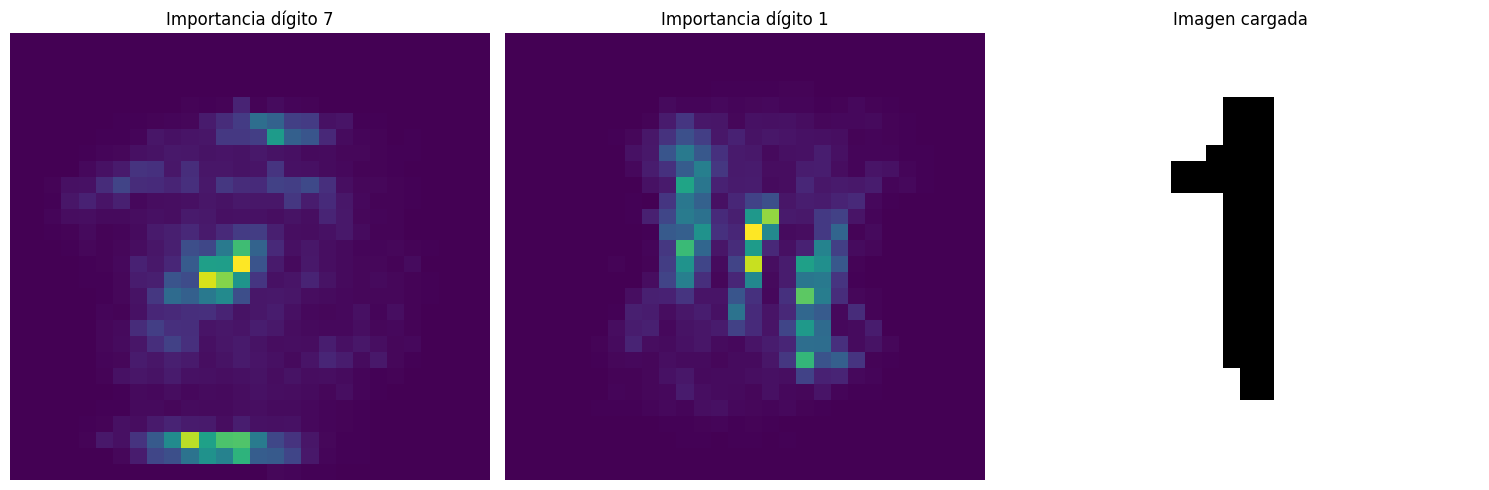

In [41]:
path = "/content/drive/MyDrive/TSFC3_Ciencia_de_Datos/Clase09/1.png"
img_flat, img_array = cargar_imagen(path)

comparar_importancias_con_imagen(
    digito1=7,
    digito2=1,
    X_train=X_train,
    y_train=y_train,
    img_flat=img_flat,
    img_array=img_array,
    umbral=0.1
)

Podemos observar que la parte central es lo que coincide en ambos casos, los pixeles del centro son aquellos que influyen más.

## Digito 2
No tuvimos problema, veremos con el que más se acerco.

Coincidencia con imagen para dígito 3: 40.26%
Coincidencia con imagen para dígito 2: 26.40%


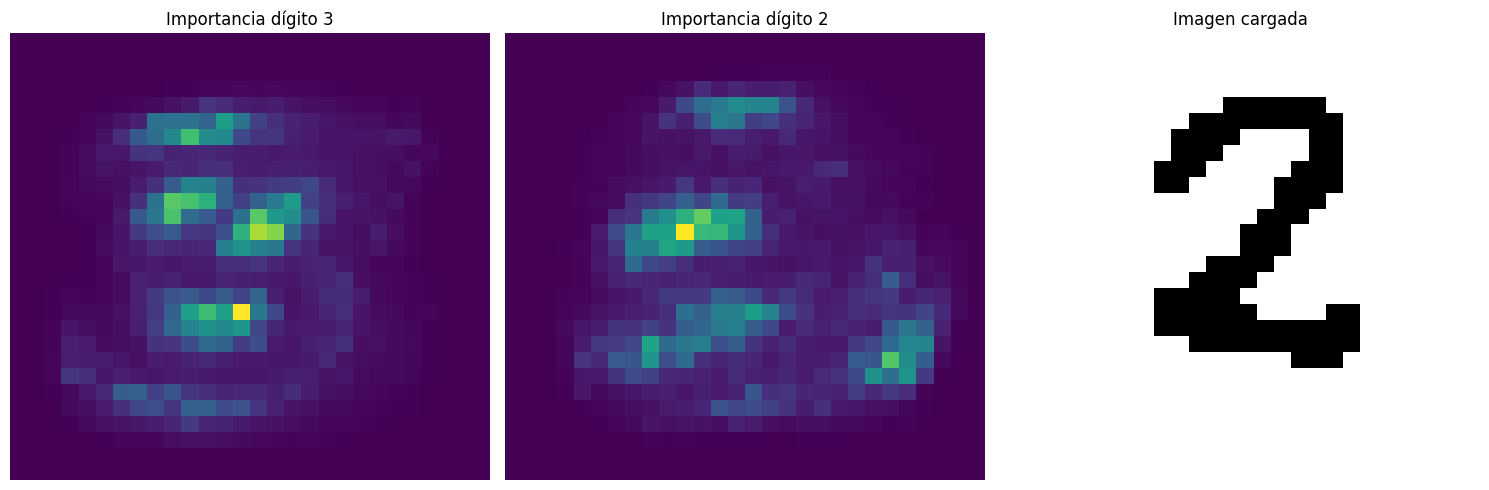

In [42]:
path = "/content/drive/MyDrive/TSFC3_Ciencia_de_Datos/Clase09/2.png"
img_flat, img_array = cargar_imagen(path)

comparar_importancias_con_imagen(
    digito1=3,
    digito2=2,
    X_train=X_train,
    y_train=y_train,
    img_flat=img_flat,
    img_array=img_array,
    umbral=0.1
)

Pues aquí no teníamos porblema, pero al parecer con tenía más coinicidencia con el 3, sin embargo esto se debe a la parte superior e inferior de mi número dibujado, vemos clarmaente como ahí coincide.

## Digito 3

No tuvimos problemas



Coincidencia con imagen para dígito 5: 23.78%
Coincidencia con imagen para dígito 3: 31.82%


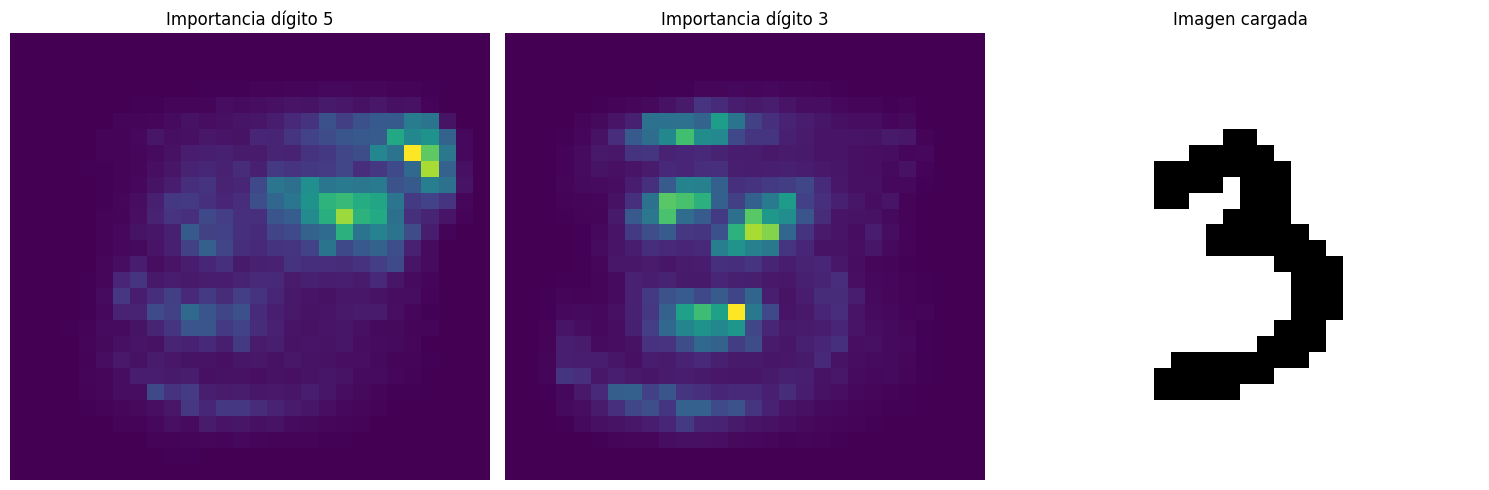

In [43]:
path = "/content/drive/MyDrive/TSFC3_Ciencia_de_Datos/Clase09/3.png"
img_flat, img_array = cargar_imagen(path)

comparar_importancias_con_imagen(
    digito1=5,
    digito2=3,
    X_train=X_train,
    y_train=y_train,
    img_flat=img_flat,
    img_array=img_array,
    umbral=0.1
)

Pues acá las coinidencias si estaban a nuestro favor, podemos ver que el problema es en esa sección de mucho calor en el 5, en su esquina superior derecha. Mi dibujo vemos como tuvo mucho color en esa misma parte.

## Digito 4

Acá tuvimos el problema del 1.

Coincidencia con imagen para dígito 1: 33.70%
Coincidencia con imagen para dígito 4: 33.62%


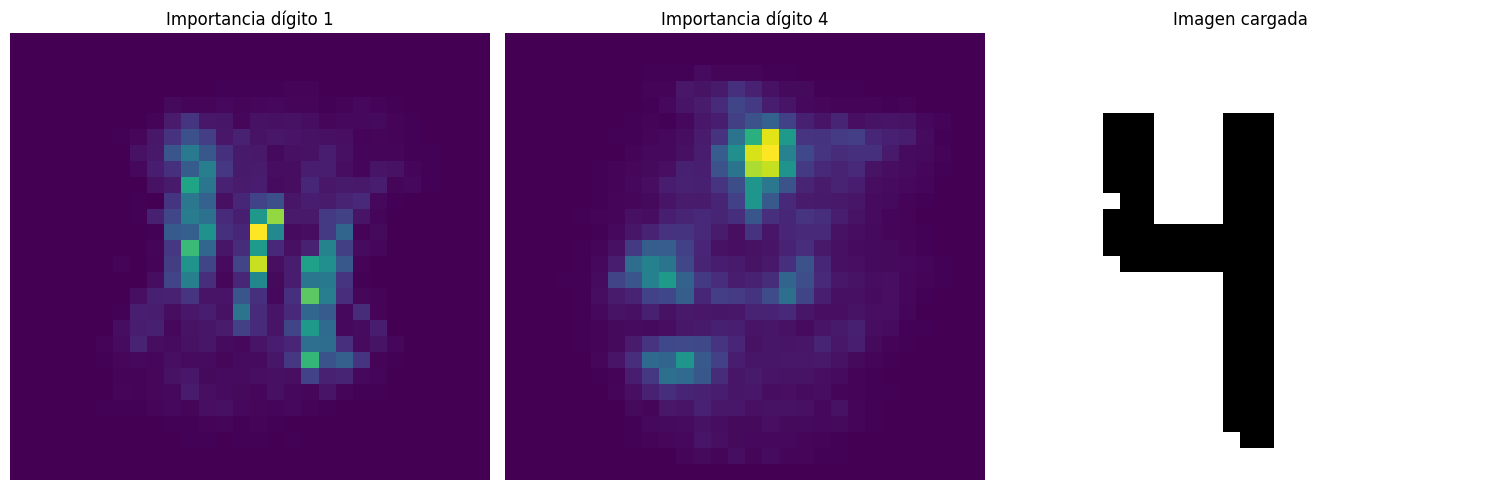

In [44]:
path = "/content/drive/MyDrive/TSFC3_Ciencia_de_Datos/Clase09/4.png"
img_flat, img_array = cargar_imagen(path)

comparar_importancias_con_imagen(
    digito1=1,
    digito2=4,
    X_train=X_train,
    y_train=y_train,
    img_flat=img_flat,
    img_array=img_array,
    umbral=0.1
)

Vemos que la posible causa son 2 motivos, la lína del 1 esta muy marcada en mi dibujo y que posiblemente la mayoría de gente escrube el 4 con el triangulo. Tuvimos casi la misma coincidencia en ambos casos.

## Digito 5

No tuvimos problema

Coincidencia con imagen para dígito 3: 38.96%
Coincidencia con imagen para dígito 5: 21.95%


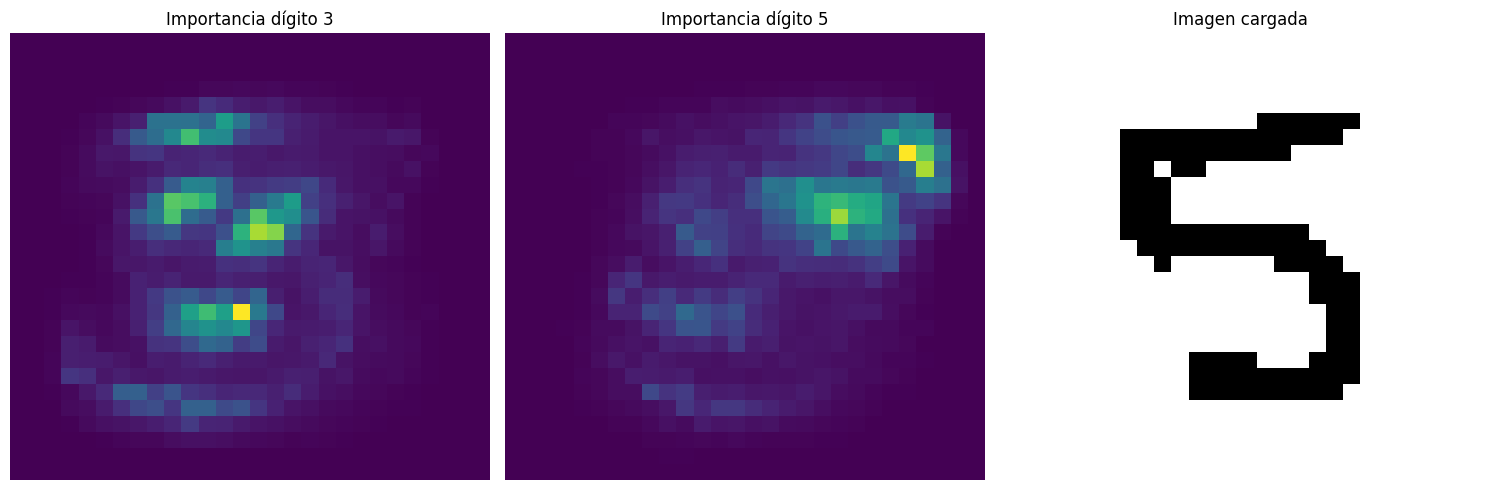

In [45]:
path = "/content/drive/MyDrive/TSFC3_Ciencia_de_Datos/Clase09/5.png"
img_flat, img_array = cargar_imagen(path)

comparar_importancias_con_imagen(
    digito1=3,
    digito2=5,
    X_train=X_train,
    y_train=y_train,
    img_flat=img_flat,
    img_array=img_array,
    umbral=0.1
)

Acá tambien marca que se parecía más al 3, creo deberse a que ahora no marque muy bien la parte superior derecha del 5 y que justo la u rotada que se forma en la parte inferior si concuerda con el 3.

## Digito 6

No tuvimos porblema

Coincidencia con imagen para dígito 5: 26.83%
Coincidencia con imagen para dígito 6: 43.04%


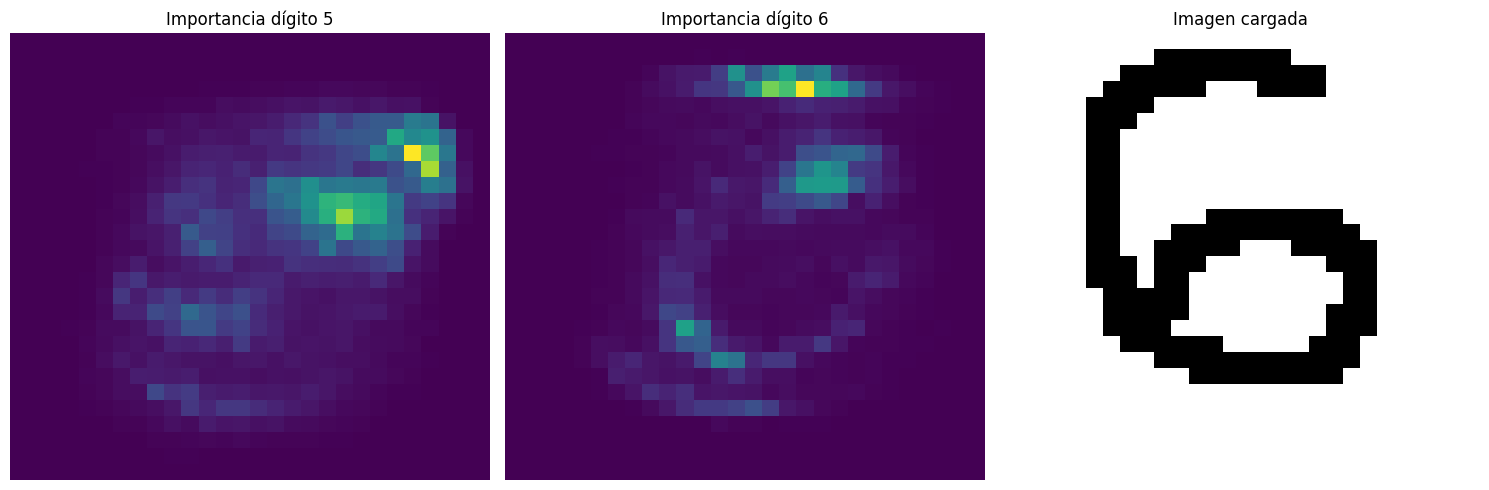

In [46]:
path = "/content/drive/MyDrive/TSFC3_Ciencia_de_Datos/Clase09/6.png"
img_flat, img_array = cargar_imagen(path)

comparar_importancias_con_imagen(
    digito1=5,
    digito2=6,
    X_train=X_train,
    y_train=y_train,
    img_flat=img_flat,
    img_array=img_array,
    umbral=0.1
)

Vemos que lo que pudo haber causado probelmas es jsutamente esa parte tan comentada del 5, pero sin embargo el circulo del 6 se logra distinguir sin problemas en la comparación con mi imagen.

## Digito 7

Tuvimos problemas.

Coincidencia con imagen para dígito 2: 15.17%
Coincidencia con imagen para dígito 7: 30.43%


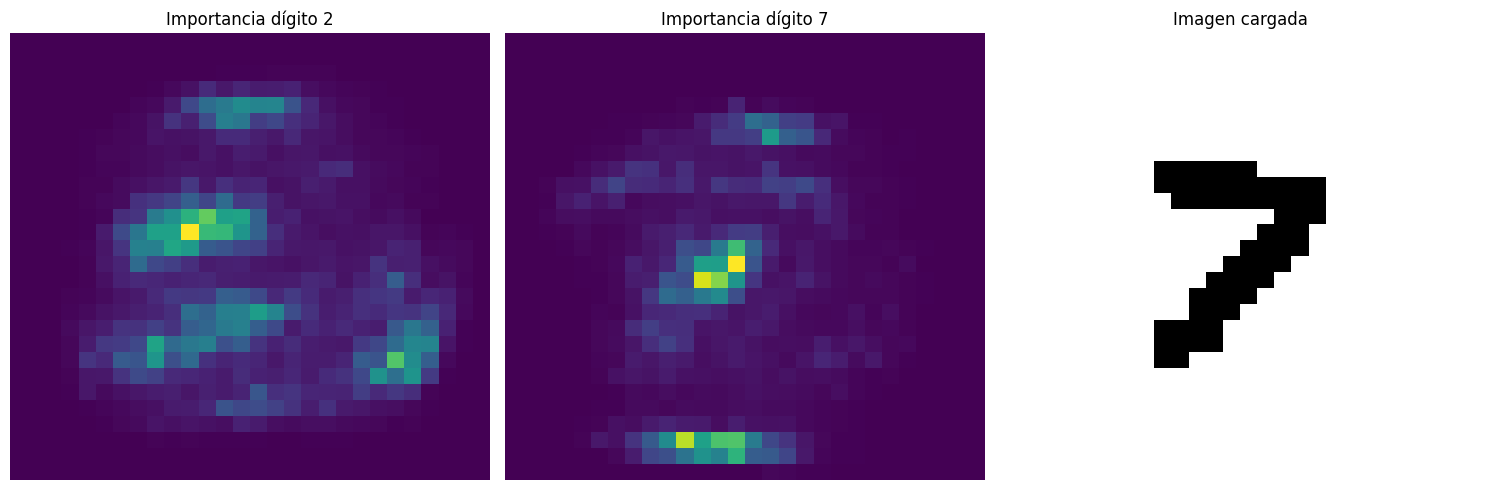

In [47]:
path = "/content/drive/MyDrive/TSFC3_Ciencia_de_Datos/Clase09/7.png"
img_flat, img_array = cargar_imagen(path)

comparar_importancias_con_imagen(
    digito1=2,
    digito2=7,
    X_train=X_train,
    y_train=y_train,
    img_flat=img_flat,
    img_array=img_array,
    umbral=0.1
)

Acá dice parecerse bastante al 7, sin embargo parece ser que el problema viene de haber hecho al número tan pequeño, lo que pudo hacer que la diagonal del 2 tomara mayor relevancia, tambien la parte superior.

## Digito 8

Tuvimos problemas.

Coincidencia con imagen para dígito 9: 35.54%
Coincidencia con imagen para dígito 8: 33.94%


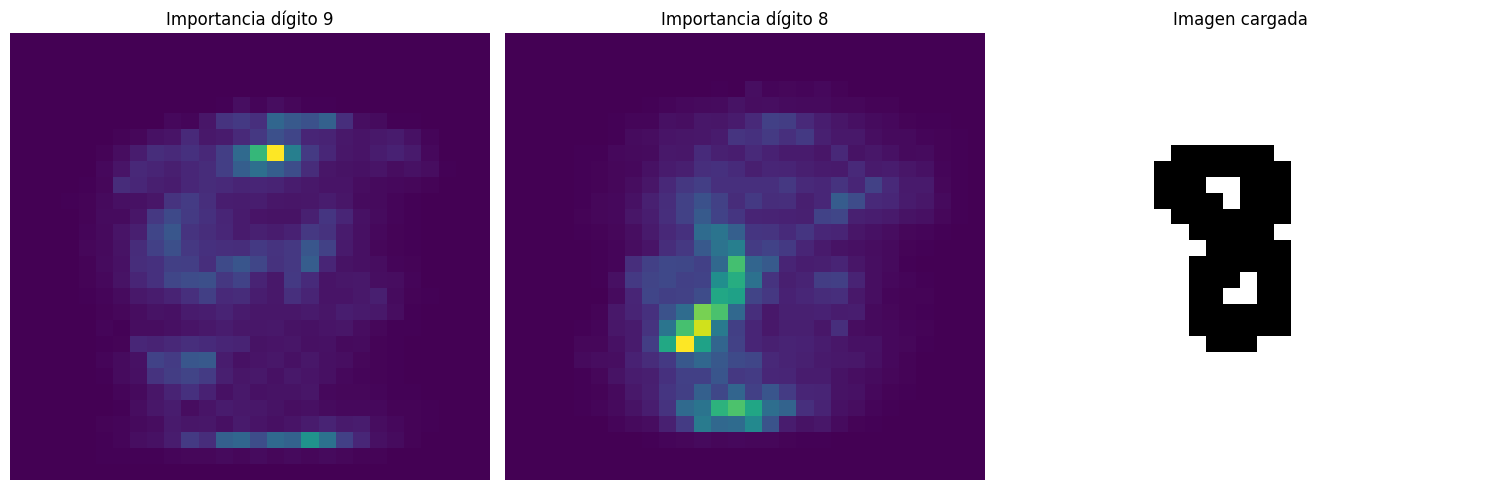

In [48]:
path = "/content/drive/MyDrive/TSFC3_Ciencia_de_Datos/Clase09/8.png"
img_flat, img_array = cargar_imagen(path)

comparar_importancias_con_imagen(
    digito1=9,
    digito2=8,
    X_train=X_train,
    y_train=y_train,
    img_flat=img_flat,
    img_array=img_array,
    umbral=0.1
)

Parece ser que el probelma viene del mismo argumento, este número lo hice demasiado pequeño como para que los circulos del 8 tomaran la relvancia que deberían tomar. Podemos notar que tiene más coincidenicas la imagen del 9 y esto es debido a que no parecen curvas, parecen líneas planas, como la recta del 9.

## Digito 9

Tuvimos problemas.

Coincidencia con imagen para dígito 7: 29.35%
Coincidencia con imagen para dígito 9: 32.23%


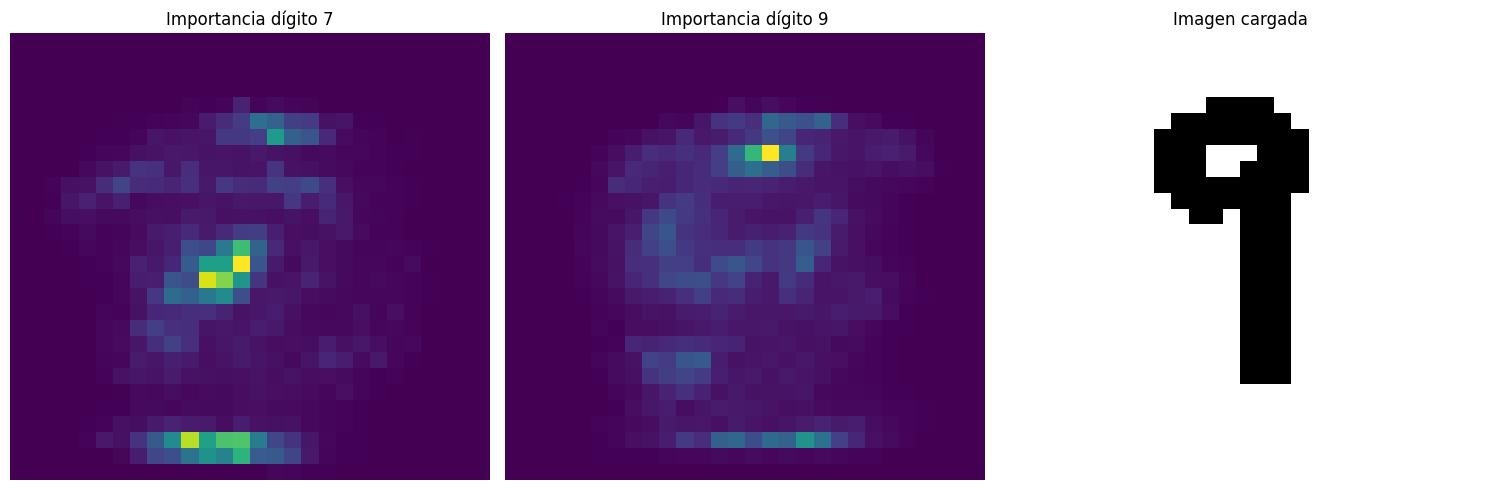

In [49]:
path = "/content/drive/MyDrive/TSFC3_Ciencia_de_Datos/Clase09/9.png"
img_flat, img_array = cargar_imagen(path)

comparar_importancias_con_imagen(
    digito1=7,
    digito2=9,
    X_train=X_train,
    y_train=y_train,
    img_flat=img_flat,
    img_array=img_array,
    umbral=0.1
)

Creo que falto hacer más grande el circulo del 9, además de agregar la curva de abajo, pero si parece que coincide más con el 9, el error a creer que es 7 ha de ser que ese circulo esta tan junto que no lo cuenta tanto como vacio.

## Digito 0

No tuvimos problemas.

Coincidencia con imagen para dígito 7: 28.26%
Coincidencia con imagen para dígito 0: 32.97%


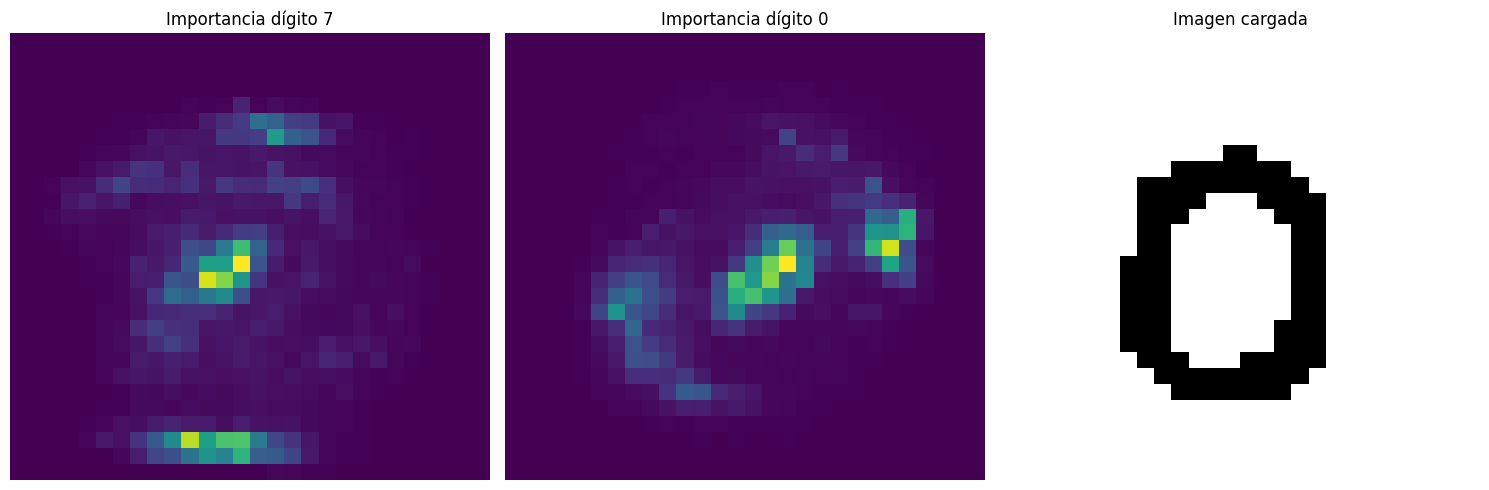

In [50]:
path = "/content/drive/MyDrive/TSFC3_Ciencia_de_Datos/Clase09/0.png"
img_flat, img_array = cargar_imagen(path)

comparar_importancias_con_imagen(
    digito1=7,
    digito2=0,
    X_train=X_train,
    y_train=y_train,
    img_flat=img_flat,
    img_array=img_array,
    umbral=0.1
)

Es muy claro el circulo del 0, por eso no tuvimos problemas.